In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import pandas as pd
import numpy as np
import duckdb
from src.data_preprocess import get_multiplicatively_adjusted_prices
import plotly.express as px

In [3]:
with duckdb.connect('../data/main.duckdb') as conn:
    div_data = conn.sql("SELECT * FROM tinvest_dividends").df()
    t_candles = conn.sql("SELECT * FROM tinvest_shares_candles").df()
    m_candles = conn.sql("SELECT * FROM moex_shares_candles").df()
    t_info = conn.sql("SELECT * FROM tinvest_shares_info").df()

In [4]:
short_list = t_info[t_info['figi'].isin(t_candles['figi'].unique())]
figi2ticker = dict(zip(short_list['figi'], short_list['ticker']))
ticker2figi = {v: k for k, v in figi2ticker.items()}

## dividends

In [19]:
weights.shape[0]

56

In [25]:
tmp = pd.merge(
    div_data.groupby(['figi', 'last_buy_date']).size().loc[lambda x: x > 1].reset_index(),
    div_data, on = ['figi', 'last_buy_date'])
tmp

,figi,last_buy_date,0,dividend_net,payment_date,declared_date,dividend_type,record_date,regularity,close_price,yield_value,created_at
0,BBG000W325F7,2021-07-08,2,5.000000,2021-08-16,2021-06-30,,2021-07-11,,367.00000,1.36,2021-08-11 05:04:25.233947
1,BBG000W325F7,2021-07-08,2,4.000000,2021-08-16,2021-06-30,,2021-07-11,,367.00000,1.09,2021-08-11 05:04:25.233947
2,BBG000W325F7,2024-07-05,2,10.000000,2024-08-12,2024-06-27,,2024-07-08,,831.50000,1.20,2024-07-09 02:20:15.247294
3,BBG000W325F7,2024-07-05,2,10.000000,2024-08-12,2024-06-27,,2024-07-08,,831.50000,1.20,2024-07-09 02:20:15.247297
4,BBG004731032,2022-12-19,2,537.000000,2023-01-31,2022-12-05,,2022-12-21,,4606.50000,11.66,2023-01-21 05:00:39.156530
5,BBG004731032,2022-12-19,2,256.000000,2023-01-31,2022-12-05,,2022-12-21,,4606.50000,5.56,2023-01-21 05:00:39.156530
6,BBG00475JZZ6,2017-07-17,2,0.014266,2017-08-23,2017-06-29,,2017-07-19,,0.17685,8.07,2020-12-08 14:05:33.625739
7,BBG00475JZZ6,2017-07-17,2,0.001116,2017-08-23,2017-06-29,,2017-07-19,,0.17685,0.63,2020-12-08 14:05:33.625739
8,BBG00475K6C3,2015-06-03,2,14.650000,2015-07-10,2015-05-25,,2015-06-05,,622.00000,2.36,2020-12-08 14:05:33.625739
9,BBG00475K6C3,2015-06-03,2,12.810000,2015-07-10,2015-05-25,,2015-06-05,,622.00000,2.06,2020-12-08 14:05:33.625739


In [26]:
def decay_rank(div_data):
    yield_df = div_data.pivot_table(index = 'last_buy_date', columns = 'figi', values = 'yield_value', aggfunc = 'sum')
    weights = np.arange(1, yield_df.shape[0] + 1).reshape(-1, 1)/yield_df.shape[0]
    return (weights * yield_df).sum()

In [39]:
rank_df.iloc[-40:].groupby('sector')['div_sum'].agg(['sum', 'count'])

,sum,count
sector,,
consumer,136.58,3
energy,802.52,11
financial,230.19,4
industrials,90.80,1
materials,625.37,9
real_estate,81.03,1
telecom,244.53,3
utilities,480.56,8


In [36]:
rank_df = pd.concat([
    div_data.groupby('figi')['yield_value'].sum().sort_values().rename("div_sum"),
    decay_rank(div_data).rename("decay_rank")], axis = 1).reset_index()
rank_df['ticker'] = rank_df['figi'].map(figi2ticker)
rank_df = pd.merge(rank_df, t_info[['figi', 'sector', 'lot']], on = 'figi').sort_values('div_sum')
rank_df

,figi,div_sum,decay_rank,ticker,sector,lot
0,TCS00A107J11,0.47,0.466795,DELI,it,1
1,RU000A106T36,1.46,1.400273,ASTR,it,1
2,BBG009GSYN76,1.84,0.681636,CBOM,financial,100
3,TCS00A107T19,1.93,1.899295,YDEX,it,1
4,TCS00A0ZZFS9,2.46,2.309045,LEAS,other,1
...,...,...,...,...,...,...
65,BBG004S681B4,90.94,38.791045,NLMK,materials,10
66,BBG004S686N0,91.35,47.831955,BANEP,energy,1
67,BBG00475K6C3,98.51,43.106023,CHMF,materials,1
68,BBG004S681W1,110.06,55.125818,MTSS,telecom,10


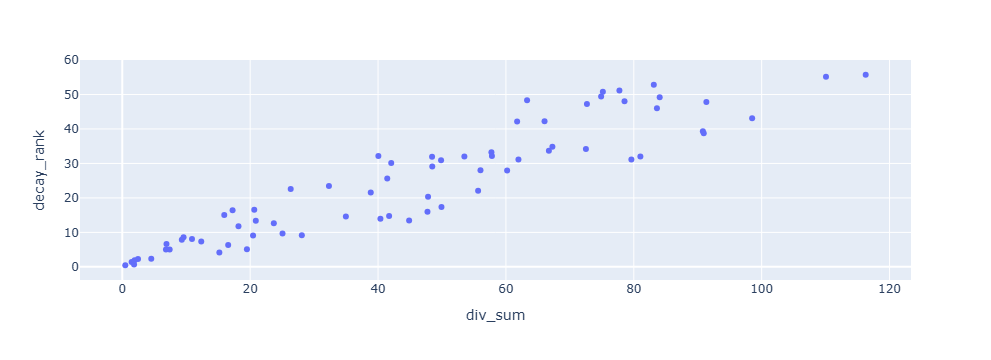

In [34]:
fig = px.scatter(rank_df, x = 'div_sum', y = 'decay_rank', hover_data='ticker')
fig.show()

In [50]:
t_candles[t_candles['figi'].isin(rank_df['figi'].iloc[-40:])].groupby('figi')['time'].min().value_counts()

time
2015-01-01    21
2015-01-05    19
Name: count, dtype: int64

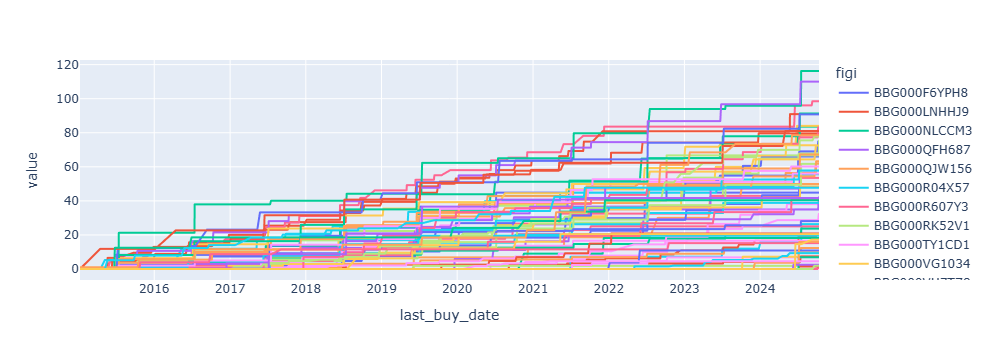

In [46]:
tmp = div_data.pivot_table(index = 'last_buy_date', columns = 'figi', values = 'yield_value', aggfunc = 'sum').fillna(0).cumsum()
fig = px.line(tmp)
fig.show()

In [ ]:
fig = px.scatter(rank_df, x = 'div_sum', y = 'decay_rank', hover_data='ticker')
fig.show()

## info

In [8]:
t_info[t_info['figi'].isin(t_candles['figi'].unique())].groupby('sector').size()

sector
consumer        8
energy         14
financial      11
health_care     1
industrials     5
it              8
materials      18
other           1
real_estate     4
telecom         3
utilities      10
dtype: int64

## price

In [47]:
price_data = t_candles.pivot(index = 'time', columns = 'figi', values = 'close')

In [50]:
adj_price = get_multiplicatively_adjusted_prices(price_data, div_data[div_data['figi'].isin(price_data.columns)])
adj_price = adj_price.rename(columns = figi2ticker)

In [51]:
tmp = t_candles.groupby('figi')['time'].agg(['min', 'max', 'count']).sort_values('count')
tmp.index = tmp.index.map(figi2ticker)
tmp

,min,max,count
figi,,,
MBNK,2024-04-26,2024-10-31,133
LEAS,2024-03-29,2024-10-31,153
DELI,2024-02-07,2024-10-31,188
SVCB,2023-12-15,2024-10-31,224
UGLD,2023-11-22,2024-10-31,241
...,...,...,...
NVTK,2015-01-01,2024-10-31,2498
MGNT,2015-01-01,2024-10-31,2498
ROSN,2015-01-01,2024-10-31,2498


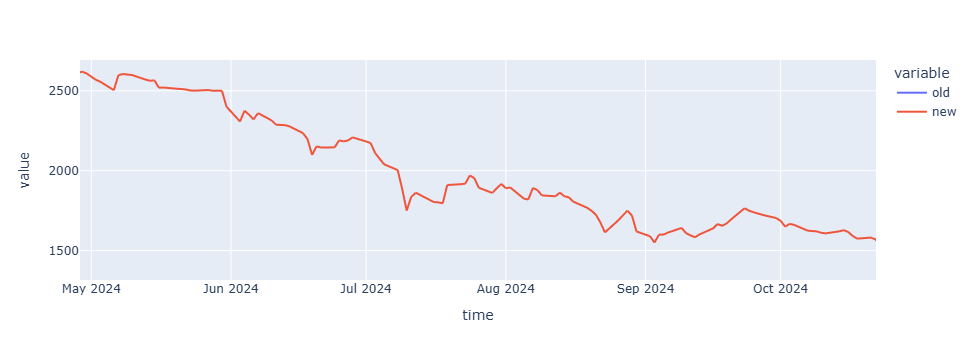

In [52]:
ticker = 'MBNK'
fig = px.line(pd.concat([price_data[ticker2figi[ticker]].rename('old'), adj_price[ticker].rename('new')], axis = 1))
fig.show()